In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
ds1 = pd.read_csv("leetcode_ds1.csv")
ds2 = pd.read_csv("leetcode_ds2.csv")
print(ds1.columns)
print(ds2.columns)

Index(['id', 'title', 'description', 'is_premium', 'difficulty',
       'solution_link', 'acceptance_rate', 'frequency', 'url', 'discuss_count',
       'accepted', 'submissions', 'companies', 'related_topics', 'likes',
       'dislikes', 'rating', 'asked_by_faang', 'similar_questions'],
      dtype='object')
Index(['Question ID', 'Question Title', 'Question Slug', 'Question Text',
       'Topic Tagged text', 'Difficulty Level', 'Success Rate',
       'total submission', 'total accepted', 'Likes', 'Dislikes', 'Hints',
       'Similar Questions ID', 'Similar Questions Text'],
      dtype='object')


In [3]:
print(ds1.info(), "\n")
print(ds2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1825 non-null   int64  
 1   title              1825 non-null   object 
 2   description        1825 non-null   object 
 3   is_premium         1825 non-null   int64  
 4   difficulty         1825 non-null   object 
 5   solution_link      987 non-null    object 
 6   acceptance_rate    1825 non-null   float64
 7   frequency          1825 non-null   float64
 8   url                1825 non-null   object 
 9   discuss_count      1825 non-null   int64  
 10  accepted           1825 non-null   object 
 11  submissions        1825 non-null   object 
 12  companies          1749 non-null   object 
 13  related_topics     1571 non-null   object 
 14  likes              1825 non-null   int64  
 15  dislikes           1825 non-null   int64  
 16  rating             1825 

In [4]:
# Changing the column names to match and dropping useless columns
ds1 = ds1.rename(columns={"id": "Question ID", "title": "Question Title", "difficulty": "Difficulty Level", "similar_questions": "Similar Questions Text", "solution_link": "Solution Link"})
ds1 = ds1[["Question ID", "Question Title", "Difficulty Level", "Similar Questions Text", "Solution Link", "url"]]
ds1 = ds1.set_index("Question ID")
ds1.head()

,Question Title,Difficulty Level,Similar Questions Text,Solution Link,url
Question ID,,,,,
1,Two Sum,Easy,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl...",/articles/two-sum,https://leetcode.com/problems/two-sum
2,Add Two Numbers,Medium,"[Multiply Strings, /problems/multiply-strings/...",/articles/add-two-numbers,https://leetcode.com/problems/add-two-numbers
3,Longest Substring Without Repeating Characters,Medium,[Longest Substring with At Most Two Distinct C...,/articles/longest-substring-without-repeating-...,https://leetcode.com/problems/longest-substrin...
4,Median of Two Sorted Arrays,Hard,NaN,/articles/median-of-two-sorted-arrays,https://leetcode.com/problems/median-of-two-so...
5,Longest Palindromic Substring,Medium,"[Shortest Palindrome, /problems/shortest-palin...",/articles/longest-palindromic-substring,https://leetcode.com/problems/longest-palindro...


In [5]:
# Dropping useless columns in ds2
ds2 = ds2[["Question ID", "Question Title", "Difficulty Level", "Similar Questions Text", "Question Text"]]
ds2 = ds2.set_index("Question ID")
ds2.head()

,Question Title,Difficulty Level,Similar Questions Text,Question Text
Question ID,,,,
1,Two Sum,Easy,"3Sum,4Sum,Two Sum II - Input Array Is Sorted,T...",Given an array of integers nums and an integer...
2,Add Two Numbers,Medium,"Multiply Strings,Add Binary,Sum of Two Integer...",You are given two non-empty linked lists repre...
3,Longest Substring Without Repeating Characters,Medium,Longest Substring with At Most Two Distinct Ch...,"Given a string s, find the length of the longe..."
4,Median of Two Sorted Arrays,Hard,NaN,Given two sorted arrays nums1 and nums2 of siz...
5,Longest Palindromic Substring,Medium,"Shortest Palindrome,Palindrome Permutation,Pal...","Given a string s, return the longest palindrom..."


In [6]:
# Merging the two datasets and making a couple of changes
merged = pd.merge(ds1, ds2, on="Question ID", how="inner")
dupplicate_columns = [x for x in merged.columns if x.endswith("_y")]
merged = merged.drop(dupplicate_columns, axis=1)
merged = merged.rename(columns={x: x.replace("_x", "") for x in merged.columns})
merged = merged.dropna()
merged["Solution Link"] = merged["Solution Link"].apply(lambda x: "https://leetcode.com" + x)
merged.head()

,Question Title,Difficulty Level,Similar Questions Text,Solution Link,url,Question Text
Question ID,,,,,,
1,Two Sum,Easy,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl...",https://leetcode.com/articles/two-sum,https://leetcode.com/problems/two-sum,Given an array of integers nums and an integer...
2,Add Two Numbers,Medium,"[Multiply Strings, /problems/multiply-strings/...",https://leetcode.com/articles/add-two-numbers,https://leetcode.com/problems/add-two-numbers,You are given two non-empty linked lists repre...
3,Longest Substring Without Repeating Characters,Medium,[Longest Substring with At Most Two Distinct C...,https://leetcode.com/articles/longest-substrin...,https://leetcode.com/problems/longest-substrin...,"Given a string s, find the length of the longe..."
5,Longest Palindromic Substring,Medium,"[Shortest Palindrome, /problems/shortest-palin...",https://leetcode.com/articles/longest-palindro...,https://leetcode.com/problems/longest-palindro...,"Given a string s, return the longest palindrom..."
7,Reverse Integer,Easy,"[String to Integer (atoi), /problems/string-to...",https://leetcode.com/articles/reverse-integer,https://leetcode.com/problems/reverse-integer,"Given a signed 32-bit integer x, return x with..."


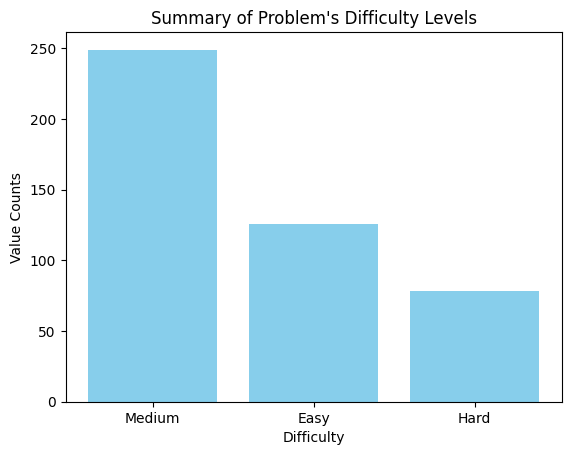

In [7]:
plt.bar(merged["Difficulty Level"].value_counts().index, merged["Difficulty Level"].value_counts().values, color='skyblue')

plt.xlabel('Difficulty')
plt.ylabel('Value Counts')
plt.title("Summary of Problem's Difficulty Levels")

plt.show()

In [8]:
python_solution_path = "PythonSolutions"
merged["Python Solution Path"] = merged["Question Title"].str.lower().str.split(" ").str.join("-")+".py"
merged["Python Solution Path"] = merged["Python Solution Path"].str.replace("(", "").str.replace(")", "").str.replace(",","").str.replace("'", "")
merged["Python Solution Path"] = merged["Python Solution Path"].apply(lambda x: "./" + python_solution_path + "/" + x)
merged["Solution Exists"] = merged["Python Solution Path"].apply(lambda x: os.path.exists(x))
merged["Solution Exists"].value_counts()

Solution Exists
True     267
False    186
Name: count, dtype: int64

In [9]:
merged_only_solutions = merged[merged["Solution Exists"] == True]
merged_only_solutions["Solution Exists"].value_counts()

Solution Exists
True    267
Name: count, dtype: int64

In [10]:
merged_only_solutions.to_csv("merged.csv")
merged_only_solutions.head()

,Question Title,Difficulty Level,Similar Questions Text,Solution Link,url,Question Text,Python Solution Path,Solution Exists
Question ID,,,,,,,,
1,Two Sum,Easy,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl...",https://leetcode.com/articles/two-sum,https://leetcode.com/problems/two-sum,Given an array of integers nums and an integer...,./PythonSolutions/two-sum.py,True
2,Add Two Numbers,Medium,"[Multiply Strings, /problems/multiply-strings/...",https://leetcode.com/articles/add-two-numbers,https://leetcode.com/problems/add-two-numbers,You are given two non-empty linked lists repre...,./PythonSolutions/add-two-numbers.py,True
3,Longest Substring Without Repeating Characters,Medium,[Longest Substring with At Most Two Distinct C...,https://leetcode.com/articles/longest-substrin...,https://leetcode.com/problems/longest-substrin...,"Given a string s, find the length of the longe...",./PythonSolutions/longest-substring-without-re...,True
5,Longest Palindromic Substring,Medium,"[Shortest Palindrome, /problems/shortest-palin...",https://leetcode.com/articles/longest-palindro...,https://leetcode.com/problems/longest-palindro...,"Given a string s, return the longest palindrom...",./PythonSolutions/longest-palindromic-substrin...,True
7,Reverse Integer,Easy,"[String to Integer (atoi), /problems/string-to...",https://leetcode.com/articles/reverse-integer,https://leetcode.com/problems/reverse-integer,"Given a signed 32-bit integer x, return x with...",./PythonSolutions/reverse-integer.py,True
